In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('indian_aqi_health_impact_2019_2024.csv')
df.head()

,City,AQI,PM2.5,PM10,NO2,CO,SO2,O3,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm),Pressure (hPa),Vehicle Count,Industrial Activity Index,Health Impact Score
0,Rajkot,59,227.411137,160.372399,44.820603,5.985617,37.125197,58.063991,11.923333,64.424980,12.921405,14.473955,976.426573,198941,4.862272,10
1,Bangalore,443,219.714245,279.801260,78.175010,5.061981,27.136555,40.777526,16.738252,23.112364,19.405409,34.790048,1022.471409,35588,5.260538,10
2,Bhopal,56,94.849259,262.324427,70.018054,6.589327,34.627094,42.726937,30.388482,63.634393,13.412998,194.360799,984.562478,430785,3.799079,10
3,Srinagar,342,120.983287,213.374289,71.842615,4.443049,32.297618,97.020499,32.694605,69.655615,19.225225,233.854741,950.209304,209382,4.426706,10
4,Hyderabad,492,184.262288,165.108731,16.167775,0.553949,6.722572,22.823065,12.514916,93.221730,10.368030,91.751966,1021.432263,257650,9.349909,10


In [3]:
df.describe()

,AQI,PM2.5,PM10,NO2,CO,SO2,O3,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm),Pressure (hPa),Vehicle Count,Industrial Activity Index,Health Impact Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,273.697000,130.406420,160.997159,42.450892,5.045096,26.190975,52.486096,27.490908,59.820975,10.228908,150.612185,1000.446611,249006.981500,4.996823,10.0
std,129.035095,69.034547,81.285641,21.669949,2.860974,13.870889,27.209957,10.142266,23.101406,5.589391,86.865542,28.955365,144968.284219,2.871439,0.0
min,50.000000,10.024561,20.021018,5.007963,0.100010,2.003134,5.017098,10.007962,20.009695,0.500367,0.026725,950.004173,1129.000000,0.000059,10.0
25%,164.000000,70.513750,90.393238,23.506284,2.577681,13.933260,29.314096,18.799720,39.964732,5.437936,74.847066,975.185884,123054.000000,2.492639,10.0
50%,273.000000,130.308975,161.102626,42.890686,5.019324,26.436409,52.375775,27.475638,59.889662,10.249180,149.846369,1000.557615,247375.000000,5.016819,10.0
75%,385.000000,190.165779,231.235829,61.265582,7.525486,38.144326,75.911455,36.270073,79.988622,14.970575,225.748593,1025.912885,375983.000000,7.444906,10.0
max,499.000000,249.996746,299.977625,79.986082,9.999906,49.990917,99.998487,44.997093,99.982094,19.998739,299.975927,1049.984846,499974.000000,9.998473,10.0



### AQI distribution

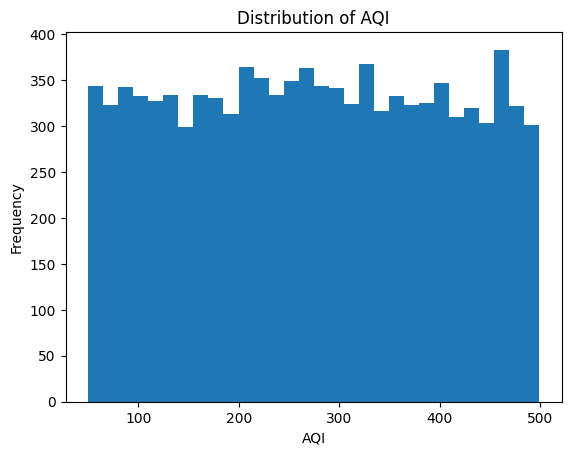

In [4]:
import matplotlib.pyplot as plt

plt.hist(df["AQI"], bins=30)
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.title("Distribution of AQI")
plt.show()

### Pollutant distributions

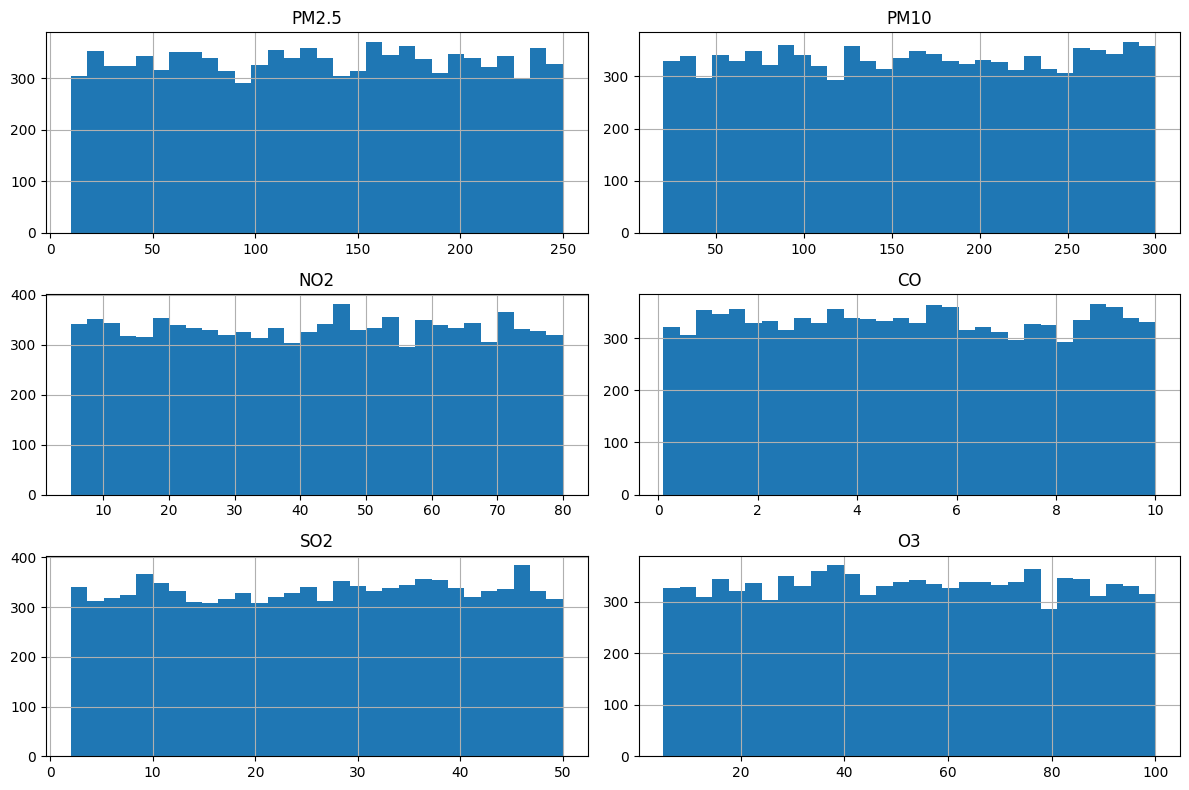

In [5]:
pollutants = ["PM2.5","PM10","NO2","CO","SO2","O3"]

df[pollutants].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

### City-wise AQI summary

In [6]:
df.groupby("City")["AQI"].agg(["min","mean","max"]).sort_values("mean", ascending=False)

,min,mean,max
City,,,
Ahmedabad,50,288.756322,498
Kolkata,52,283.695444,499
Thane,51,283.443418,499
Jaipur,50,281.572864,497
Vadodara,51,279.760192,499
Lucknow,55,277.361991,499
Nashik,51,275.736607,499
Surat,50,275.475543,496
Hyderabad,51,274.559809,498


### Boxplot

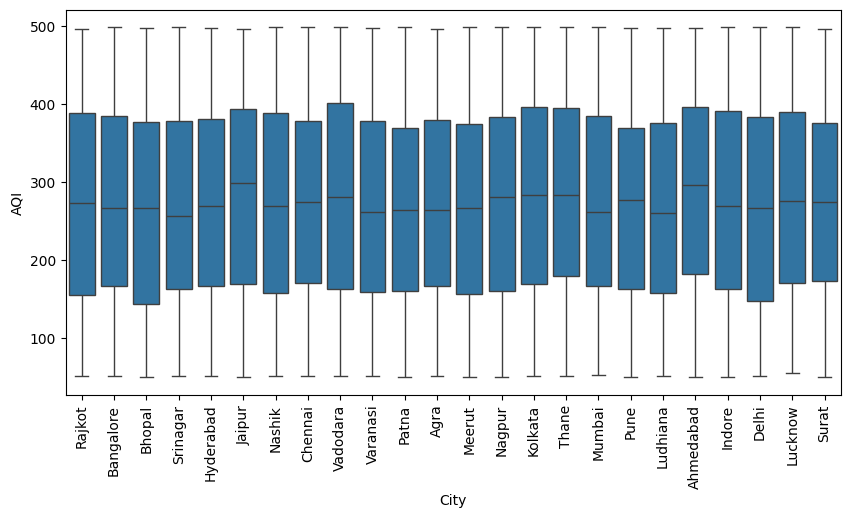

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x="City", y="AQI", data=df)
plt.xticks(rotation=90)
plt.show()

### Correlation Analysis

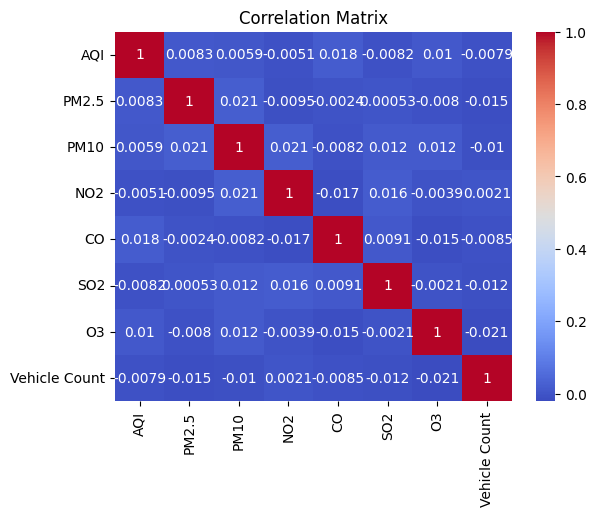

In [8]:
corr = df[
    ["AQI","PM2.5","PM10","NO2","CO","SO2","O3","Vehicle Count"]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Vehicle Count vs pollutants

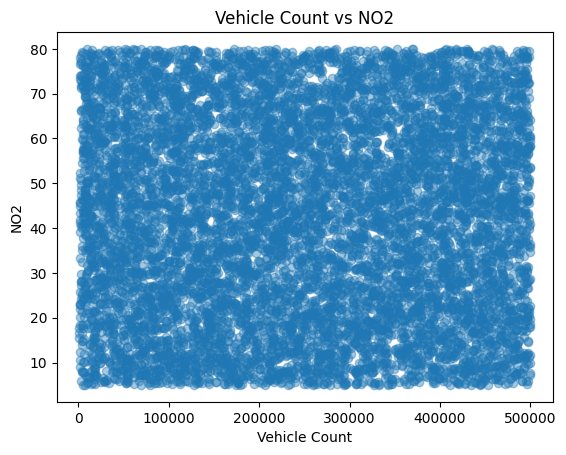

In [9]:
plt.scatter(df["Vehicle Count"], df["NO2"], alpha=0.4)
plt.xlabel("Vehicle Count")
plt.ylabel("NO2")
plt.title("Vehicle Count vs NO2")
plt.show()

### Wind speed vs PM2.5

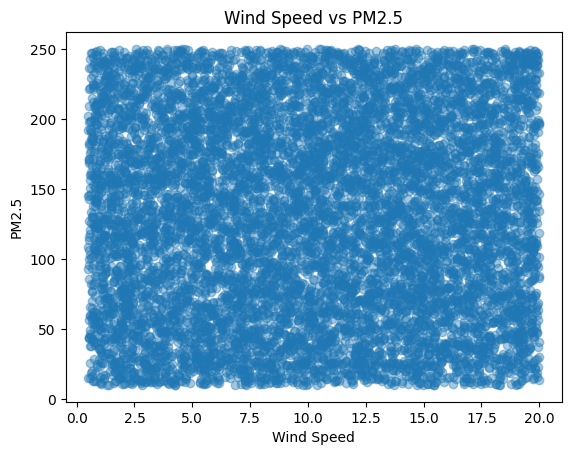

In [10]:
plt.scatter(df["Wind Speed (km/h)"], df["PM2.5"], alpha=0.4)
plt.xlabel("Wind Speed")
plt.ylabel("PM2.5")
plt.title("Wind Speed vs PM2.5")
plt.show()

### STATISTICAL ANALYSIS

H1: Traffic increases pollution

In [11]:
from scipy.stats import pearsonr

pearsonr(df["Vehicle Count"], df["NO2"])

PearsonRResult(statistic=np.float64(0.002060860418928808), pvalue=np.float64(0.8367436542400667))

### Group Comparison (AQI Categories)
### Create AQI category

In [12]:
df["AQI_Category"] = pd.cut(
    df["AQI"],
    bins=[0,50,100,200,300,500],
    labels=["Good","Satisfactory","Moderate","Poor","Very Poor"]
)

### ANOVA: PM2.5 across AQI categories

In [13]:
from scipy.stats import f_oneway

groups = [
    df[df["AQI_Category"] == cat]["PM2.5"]
    for cat in df["AQI_Category"].dropna().unique()
]

f_oneway(*groups)

F_onewayResult(statistic=np.float64(0.7071127480084896), pvalue=np.float64(0.5869517633706287))

### Principal Component Analysis (PCA) 

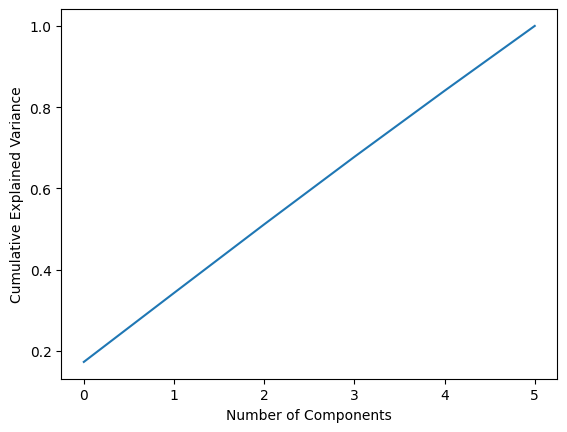

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

X_scaled = StandardScaler().fit_transform(df[pollutants])
pca = PCA()
pca.fit(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

The cumulative explained variance plot from PCA indicates the absence of a dominant principal component, suggesting that air pollution variability arises from multiple interacting factors. As no clear elbow point is observed, dimensionality reduction via PCA would obscure interpretability. Hence, an explainable machine learning approach was adopted to capture non-linear relationships while retaining feature-level attribution.

PCA shows that air pollution is driven by multiple interacting factors rather than a single dominant source, which motivated the use of explainable machine learning instead of dimensionality reduction.